In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import selenium
import matplotlib.pyplot as plt
import plotly.express as px
import wbgapi as wb
import numpy as np
import dash_bootstrap_components as dbc
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output



C:\Users\marro\AppData\Local\Temp\ipykernel_8752\2704422244.py:11: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\marro\AppData\Local\Temp\ipykernel_8752\2704422244.py:12: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2025-01-28
3,Worldwide Governance Indicators,WGI,3,2024-11-05
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2024-12-03
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2024-06-25
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2024-12-17
15,Global Economic Monitor,GEM,3,2025-01-27


In [3]:
# wb.series.info()
# wb.series.info(db=14)
# wb.series.info(q='women')
# wb.series.info(db=14)
# wb.economy.info()
# wb.time.info()
wb.region.info()

code,name
AFE,Africa Eastern and Southern
AFR,Africa
AFW,Africa Western and Central
ARB,Arab World
CAA,Sub-Saharan Africa (IFC classification)
CEA,East Asia and the Pacific (IFC classification)
CEB,Central Europe and the Baltics
CEU,Europe and Central Asia (IFC classification)
CLA,Latin America and the Caribbean (IFC classification)
CME,Middle East and North Africa (IFC classification)


In [4]:
wb.search('pound')

No match

In [5]:
wb.series.metadata.get('NY.GDP.MKTP.CD')

Field,Value
Aggregationmethod,Gap-filled total
IndicatorName,GDP (current US$)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"Gross domestic product (GDP), though widely tracked, may not always be the most relevant summary of aggregated economic performance for all economies, especially when production occurs at the expense of consuming capital stock. While GDP estimates based on the production approach are generally more reliable than estimates compiled from the income or expenditure side, different countries use different definitions, methods, and reporting standards. World Bank staff review the quality of national accounts data and sometimes make adjustments to improve consistency with international guidelines. Nevertheless, significant discrepancies remain between international standards and actual practice. Many statistical offices, especially those in developing countries, face severe limitations in the resources, time, training, and budgets required to produce reliable and comprehensive series of national accounts statistics. Among the difficulties faced by compilers of national accounts is the extent of unreported economic activity in the informal or secondary economy. In developing countries a large share of agricultural output is either not exchanged (because it is consumed within the household) or not exchanged for money."
Longdefinition,"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used."
Periodicity,Annual
Source,"World Bank national accounts data, and OECD National Accounts data files."
Statisticalconceptandmethodology,"Gross domestic product (GDP) represents the sum of value added by all its producers. Value added is the value of the gross output of producers less the value of intermediate goods and services consumed in production, before accounting for consumption of fixed capital in production. The United Nations System of National Accounts calls for value added to be valued at either basic prices (excluding net taxes on products) or producer prices (including net taxes on products paid by producers but excluding sales or value added taxes). Both valuations exclude transport charges that are invoiced separately by producers. Total GDP is measured at purchaser prices. Value added by industry is normally measured at basic prices."
Topic,Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators


In [6]:
wb.data.DataFrame(['SP.POP.TOTL','NY.GDP.PCAP.CD'],
                  ['BRA','COL','ARG'], range(2010,2015))

YR2010        YR2011        YR2012  \
economy series                                                     
ARG     NY.GDP.PCAP.CD  1.026013e+04  1.270428e+04  1.294972e+04   
        SP.POP.TOTL     4.128869e+07  4.173066e+07  4.216172e+07   
BRA     NY.GDP.PCAP.CD  1.140328e+04  1.339662e+04  1.252172e+04   
        SP.POP.TOTL     1.937019e+08  1.952847e+08  1.968761e+08   
COL     NY.GDP.PCAP.CD  6.398296e+03  7.400994e+03  8.108598e+03   
        SP.POP.TOTL     4.477732e+07  4.525961e+07  4.571581e+07   

                              YR2013        YR2014  
economy series                                      
ARG     NY.GDP.PCAP.CD  1.296368e+04  1.223314e+04  
        SP.POP.TOTL     4.258246e+07  4.302407e+07  
BRA     NY.GDP.PCAP.CD  1.245889e+04  1.227499e+04  
        SP.POP.TOTL     1.984783e+08  2.000851e+08  
COL     NY.GDP.PCAP.CD  8.279103e+03  8.187208e+03  
        SP.POP.TOTL     4.615158e+07  4.656543e+07

<Axes: title={'center': 'Income growth in South Asia'}>

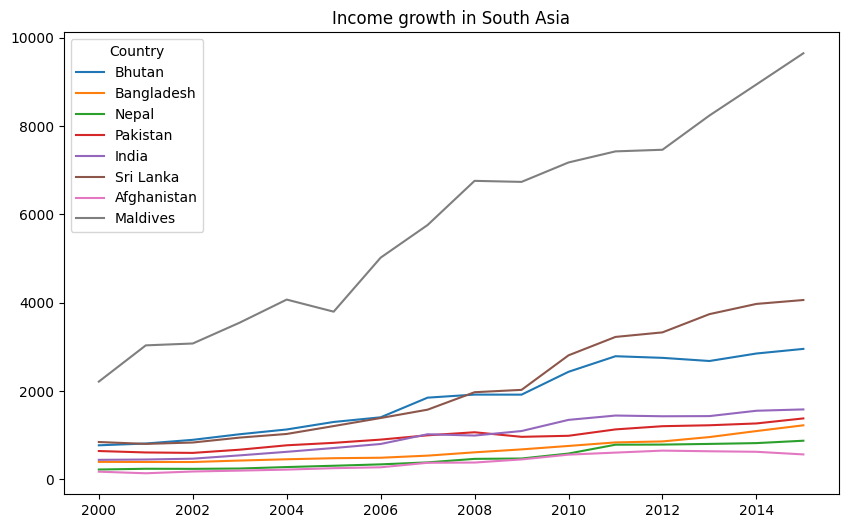

In [7]:
wb.data.DataFrame('NY.GDP.PCAP.CD',
                  economy=wb.region.members('SAS'),
                  time=range(2000,2016), numericTimeKeys=True,
                  labels=True).set_index('Country').transpose().plot(title='Income growth in South Asia', figsize=(10,6))
                  

In [8]:
# Fetch data using the World Bank API
data = wb.data.DataFrame(
    'NY.GDP.PCAP.CD',
    economy=wb.region.members('SAS'),
    time=range(2000, 2016),
    numericTimeKeys=True,
    labels=True
).set_index('Country').transpose()

# Reset index for Plotly compatibility
data = data.reset_index().rename(columns={"index": "Year"})

# Melt the data for Plotly
data_melted = pd.melt(data, id_vars=["Year"], var_name="Country", value_name="GDP per Capita")

# Create an interactive line chart using Plotly
fig = px.line(
    data_melted,
    x="Year",
    y="GDP per Capita",
    color="Country",
    title="Income Growth in South Asia",
    labels={"GDP per Capita": "GDP Per Capita (Current USD)", "Year": "Year"},
)

# Update layout for better visualization
fig.update_layout(
    title_font_size=18,
    legend_title_text="Country",
    xaxis=dict(tickangle=45),
    width=900,
    height=600,
)

# Show the figure
fig.show()


In [9]:
wb.data.DataFrame('SP.POP.TOTL', time=range(2010, 2020, 2), labels=True)

,Country,YR2010,YR2012,YR2014,YR2016,YR2018
economy,,,,,,
ZWE,Zimbabwe,13356548.0,13817887.0,14207359.0,14600294.0,15034452.0
ZMB,Zambia,13965594.0,14913629.0,15895315.0,16914423.0,17973569.0
YEM,"Yemen, Rep.",26754387.0,28433647.0,30226309.0,32109010.0,34085182.0
PSE,West Bank and Gaza,3786161.0,3979998.0,4173398.0,4367088.0,4569087.0
VIR,Virgin Islands (U.S.),108357.0,108188.0,107882.0,107516.0,107001.0
...,...,...,...,...,...,...
CEB,Central Europe and the Baltics,104421447.0,103928128.0,103459388.0,102926796.0,102439383.0
CSS,Caribbean small states,2855621.0,2893251.0,2941203.0,2987438.0,3048465.0
ARB,Arab World,363568534.0,381030177.0,400231008.0,419808341.0,435998060.0


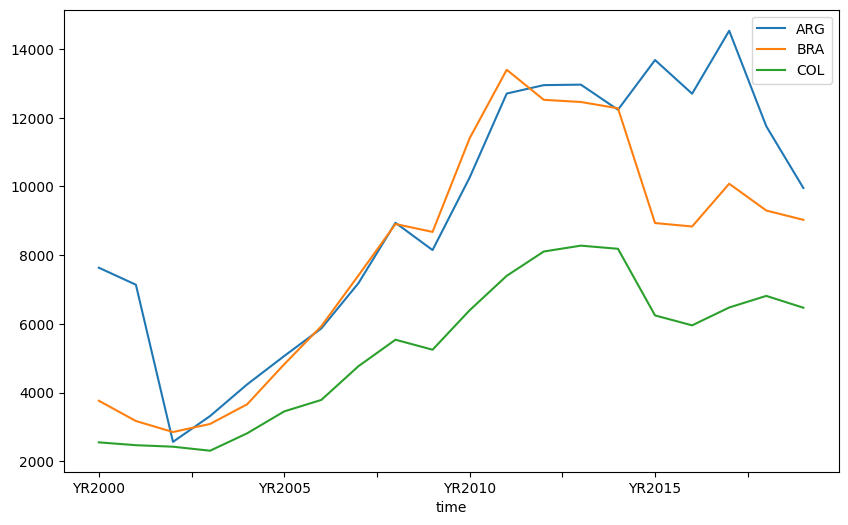

In [10]:
wb.data.DataFrame('NY.GDP.PCAP.CD', ['BRA', 'ARG', 'COL'],
                  range(2000, 2020), index='time').plot(figsize=(10, 6))
plt.show()

In [11]:
df = wb.data.DataFrame('SI.POV.NAHC', mrnev=1, columns='time', numericTimeKeys=True)
df

,2006,2007,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
economy,,,,,,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.3,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.2,NaN
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


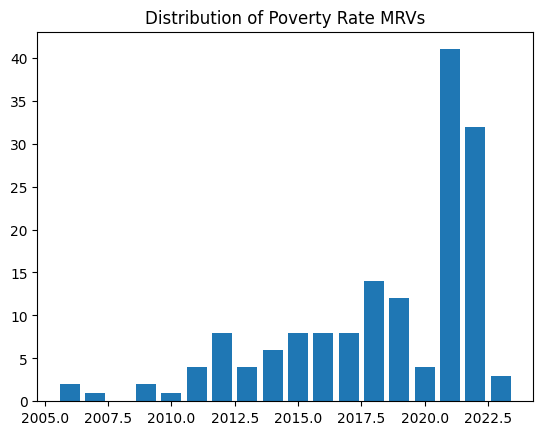

In [12]:
# Here's the same data frame plotted as a bar graph
counts = df.count()
plt.bar(counts.index, counts)
ax = plt.title('Distribution of Poverty Rate MRVs')

In [13]:
wb.source.concepts(db=57)

{'economy': {'key': 'country', 'value': 'Country'},
 'series': {'key': 'series', 'value': 'Series'},
 'time': {'key': 'time', 'value': 'Time'},
 'version': {'key': 'version', 'value': 'Version'}}

In [14]:
wb.Series(wb.source.features('version', db=57))

198904    1989 Apr
199004    1990 Apr
199009    1990 Sep
199104    1991 Apr
199109    1991 Sep
            ...   
202405    2024 May
202407    2024 Jul
202409    2024 Sep
202410    2024 Oct
202411    2024 Nov
Name: value, Length: 130, dtype: object

In [15]:
df = wb.data.DataFrame('SP.POP.TOTL', 'BRA', db=57, time=range(2000, 2020),
                       version=range(201004, 202004, 100), index='time')
df

,201004,201104,201204,201304,201404,201504,201604,201704,201804,201904
time,,,,,,,,,,
YR2000,174174447.0,174174447.0,174425387.0,174425387.0,174504898.0,174504898.0,175786441.0,175786441.0,175287587.0,175287587.0
YR2001,176659138.0,176659138.0,176877135.0,176877135.0,176968205.0,176968205.0,178419396.0,178419396.0,177750670.0,177750670.0
YR2002,179123364.0,179123364.0,179289227.0,179289227.0,179393768.0,179393768.0,181045592.0,181045592.0,180151021.0,180151021.0
YR2003,181537359.0,181537359.0,181633074.0,181633074.0,181752951.0,181752951.0,183627339.0,183627339.0,182482149.0,182482149.0
YR2004,183863524.0,183863524.0,183873377.0,183873377.0,184010283.0,184010283.0,186116363.0,186116363.0,184738458.0,184738458.0
YR2005,186074634.0,186074634.0,185986964.0,185986964.0,186142403.0,186142403.0,188479240.0,188479240.0,186917361.0,186917361.0
YR2006,188158438.0,188158438.0,187958211.0,187958211.0,188134315.0,188134315.0,190698241.0,190698241.0,189012412.0,189012412.0
YR2007,190119995.0,190119995.0,189798070.0,189798070.0,189996976.0,189996976.0,192784521.0,192784521.0,191026637.0,191026637.0
YR2008,191971506.0,191971506.0,191543237.0,191543237.0,191765567.0,191765567.0,194769696.0,194769696.0,192979029.0,192979029.0


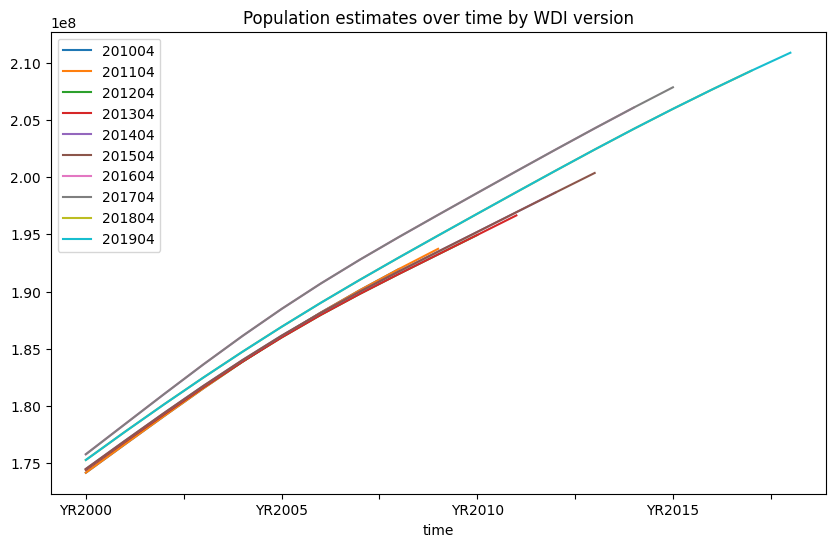

In [16]:
ax = df.plot(figsize=(10, 6), title="Population estimates over time by WDI version")

## Aggregations

In [17]:
df = wb.data.DataFrame('EG.ELC.ACCS.ZS', ['BRA', 'COL', 'PER'], time=range(1990,1996))
df

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995
economy,,,,,,
BRA,87.475116,90.606544,88.803833,89.999927,91.883728,91.728598
COL,89.900000,91.836655,92.132660,92.427994,92.721962,91.200000
PER,NaN,NaN,70.100000,64.748993,66.052933,67.354836


In [18]:
df.mean()

YR1990    88.687558
YR1991    91.221600
YR1992    83.678831
YR1993    82.392305
YR1994    83.552874
YR1995    83.427811
dtype: float64

In [19]:
combined = wb.data.DataFrame(['EG.ELC.ACCS.ZS', 'SP.POP.TOTL'], ['BRA', 'COL', 'PER'],
                             time=range(1990,1996), index=['series', 'economy'])
combined

YR1990        YR1991        YR1992  \
series         economy                                             
EG.ELC.ACCS.ZS BRA      8.747512e+01  9.060654e+01  8.880383e+01   
               COL      8.990000e+01  9.183665e+01  9.213266e+01   
               PER               NaN           NaN  7.010000e+01   
SP.POP.TOTL    BRA      1.491432e+08  1.517243e+08  1.542751e+08   
               COL      3.244007e+07  3.309837e+07  3.376057e+07   
               PER      2.201477e+07  2.248378e+07  2.294634e+07   

                              YR1993        YR1994        YR1995  
series         economy                                            
EG.ELC.ACCS.ZS BRA      8.999993e+01  9.188373e+01  9.172860e+01  
               COL      9.242799e+01  9.272196e+01  9.120000e+01  
               PER      6.474899e+01  6.605293e+01  6.735484e+01  
SP.POP.TOTL    BRA      1.567946e+08  1.592650e+08  1.617351e+08  
               COL      3.444147e+07  3.512741e+07  3.580466e+07  
               PER      2.341378e+07  2.388149e+07  2.434892e+07

In [20]:
elec_access = combined.xs('EG.ELC.ACCS.ZS')    # data frame for just a single variable
combined = combined[elec_access.isna()==False] # mask out NaN values in other variables
combined

YR1990        YR1991        YR1992  \
series         economy                                             
EG.ELC.ACCS.ZS BRA      8.747512e+01  9.060654e+01  8.880383e+01   
               COL      8.990000e+01  9.183665e+01  9.213266e+01   
               PER               NaN           NaN  7.010000e+01   
SP.POP.TOTL    BRA      1.491432e+08  1.517243e+08  1.542751e+08   
               COL      3.244007e+07  3.309837e+07  3.376057e+07   
               PER               NaN           NaN  2.294634e+07   

                              YR1993        YR1994        YR1995  
series         economy                                            
EG.ELC.ACCS.ZS BRA      8.999993e+01  9.188373e+01  9.172860e+01  
               COL      9.242799e+01  9.272196e+01  9.120000e+01  
               PER      6.474899e+01  6.605293e+01  6.735484e+01  
SP.POP.TOTL    BRA      1.567946e+08  1.592650e+08  1.617351e+08  
               COL      3.444147e+07  3.512741e+07  3.580466e+07  
               PER      2.341378e+07  2.388149e+07  2.434892e+07

In [21]:
elec_access = combined.xs('EG.ELC.ACCS.ZS')
pop = combined.xs('SP.POP.TOTL')
(elec_access*pop).sum() / pop.sum()

YR1990    87.908324
YR1991    90.826835
YR1992    87.302276
YR1993    87.635175
YR1994    89.192463
YR1995    88.968650
dtype: float64

In [22]:
c = wb.economy.DataFrame()
c['Initial'] = c['name'].str[0]
initial = c['Initial']

# another way to the same thing
initial = wb.economy.Series(name='Initial').apply(lambda n: n[0])

initial

ABW    A
AFE    A
AFG    A
AFW    A
AGO    A
      ..
XKX    K
YEM    Y
ZAF    S
ZMB    Z
ZWE    Z
Name: Initial, Length: 266, dtype: object

In [23]:
# This time we'll pull all countries, not just 3. Be sure to exclude aggregate regions
# like World or Sub-Saharan Africa
combined = wb.data.DataFrame(['EG.ELC.ACCS.ZS', 'SP.POP.TOTL'], skipAggs=True,
                             time=range(1990,1996), index=['series', 'economy'])
elec_access = combined.xs('EG.ELC.ACCS.ZS')

# mask out observations in the weight variable that are missing from the aggregated variable
combined = combined[elec_access.isna()==False]

pop = combined.xs('SP.POP.TOTL')

numerator   = (elec_access * pop).join(initial).groupby('Initial').sum()
denominator = pop.join(initial).groupby('Initial').sum()

numerator / denominator

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995
Initial,,,,,,
A,95.780387,95.952820,96.126616,96.297750,96.468972,96.640102
B,89.838599,62.530803,59.826296,59.682781,62.342033,62.355179
C,95.191828,88.595383,88.954841,89.166747,83.116034,81.322167
D,100.000000,87.222188,89.663119,90.051993,90.447886,90.856901
E,100.000000,76.332513,92.076353,93.946373,94.263941,91.881157
F,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
G,99.999760,99.999807,99.999854,88.494521,88.253563,86.068557
H,100.000000,89.096623,89.898608,90.270005,91.039354,76.030206
I,100.000000,62.177695,75.262775,54.384301,54.690727,56.554949


In [ ]:
# Fetch the data using wbdata for Poverty Rate (SI.POV.NAHC)
df_poverty = wb.data.DataFrame('SI.POV.NAHC', 
                               mrnev=1, 
                               columns='time', 
                               numericTimeKeys=True)
df_poverty = df_poverty.transpose()

# 1. Visual for GDP per Capita (Brazil, Argentina, Colombia)
df_gdp_brazil = wb.data.DataFrame('NY.GDP.PCAP.CD', 
                                  economy=['BRA', 'ARG', 'COL'],
                                  time=range(2000, 2020), 
                                  index='time')

# Convert to Plotly
fig_gdp_brazil = px.line(df_gdp_brazil, 
                          title="GDP per Capita (Brazil, Argentina, Colombia)", 
                          labels={'value': 'GDP per Capita (USD)', 'time': 'Year', 'variable': 'Country'},
                          markers=True)

# 2. Visual for Distribution of Poverty Rate (Bar Graph)
# Use the "df_poverty" data frame for the bar chart
poverty_counts = df_poverty.count(axis=1)
fig_poverty = px.bar(x=poverty_counts.index, 
                     y=poverty_counts, 
                     title="Distribution of Poverty Rate MRVs", 
                     labels={'x': 'Year', 'y': 'Poverty Rate (%)'})

# 3. Visual for Population Estimates Over Time
# Example data for demonstration purposes, replace with actual data
years = np.arange(2000, 2020)
population_data = np.random.random(20) * 100000000  # Random data for demonstration

# Plot as line chart
fig_population = px.line(x=years, 
                         y=population_data, 
                         title="Population Estimates Over Time", 
                         labels={'x': 'Year', 'y': 'Population'})

# Initialize the Dash app
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.LUX])

# Define Navbar
navbar = dbc.NavbarSimple(
    children=[
        dbc.NavItem(dbc.NavLink("Home", href="/home", active="exact")),
        dbc.NavItem(dbc.NavLink("About Me", href="/about", active="exact")),
    ],
    brand="Global Development Dashboard",
    brand_href="/home",
    color="primary",
    dark=True,
    className="mb-4"
)

# Home Layout
home_layout = html.Div([
    # Main Panel for Home Layout with the 3 tabs
    html.Div([
        dcc.Tabs([
            dcc.Tab(label='GDP per Capita (Brazil, Argentina, Colombia)', children=[
                html.Div([
                    dcc.Graph(id='gdp-brazil-graph', figure=fig_gdp_brazil),
                ]),
            ]),
            dcc.Tab(label='Poverty Rate Distribution', children=[
                html.Div([
                    dcc.Graph(id='poverty-graph', figure=fig_poverty),
                ]),
            ]),
            dcc.Tab(label='Population Estimates', children=[
                html.Div([
                    dcc.Graph(id='population-graph', figure=fig_population),
                ]),
            ]),
        ])
    ], style={'padding': '20px'})
])

# About Layout
about_layout = html.Div([
    html.H1("About This Dashboard"),
    html.P("""
        This dashboard provides an interactive way to explore key development indicators
        such as GDP per capita, poverty rate distribution, and population estimates over time.
        The visualizations offer insights into these metrics for various countries and regions,
        helping to understand global development trends.
    """),
    html.P("""
        Built with Python, Dash, Plotly, and Bootstrap, this dashboard is designed to allow
        users to interact with and analyze data, offering a dynamic and engaging user experience.
    """)
])

# Main Layout
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),  # URL handling for routing
    navbar,
    html.Div(id='page-content', style={'padding': '20px'})
])

# Callbacks for handling page routing and updating content
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname')]
)
def display_page(pathname):
    if pathname == '/about':
        return about_layout
    # Default to home layout
    return home_layout

# Run the app
app.run(jupyter_mode='external',debug=True) #port=8071


Dash app running on http://127.0.0.1:8050/


c:\Users\marro\AppData\Local\Programs\Python\Python313\Lib\site-packages\dash\dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [27]:
# Fetch the data using wbdata for Poverty Rate (SI.POV.NAHC)
df_poverty = wb.data.DataFrame('SI.POV.NAHC', 
                               mrnev=1, 
                               columns='time', 
                               numericTimeKeys=True)
df_poverty = df_poverty.transpose()

# 1. Visual for GDP per Capita (Brazil, Argentina, Colombia)
df_gdp_brazil = wb.data.DataFrame('NY.GDP.PCAP.CD', 
                                  economy=['BRA', 'ARG', 'COL'],
                                  time=range(2000, 2020), 
                                  index='time')

# Convert to Plotly
fig_gdp_brazil = px.line(df_gdp_brazil, 
                          title="GDP per Capita (Brazil, Argentina, Colombia)", 
                          labels={'value': 'GDP per Capita (USD)', 'time': 'Year', 'variable': 'Country'},
                          markers=True)

# 2. Visual for Distribution of Poverty Rate (Bar Graph)
# Use the "df_poverty" data frame for the bar chart
poverty_counts = df_poverty.count(axis=1)
fig_poverty = px.bar(x=poverty_counts.index, 
                     y=poverty_counts, 
                     title="Distribution of Poverty Rate MRVs", 
                     labels={'x': 'Year', 'y': 'Poverty Rate (%)'})

# 3. Visual for Population Estimates Over Time
# Example data for demonstration purposes, replace with actual data
years = np.arange(2000, 2020)
population_data = np.random.random(20) * 100000000  # Random data for demonstration

# Plot as line chart
fig_population = px.line(x=years, 
                         y=population_data, 
                         title="Population Estimates Over Time", 
                         labels={'x': 'Year', 'y': 'Population'})

# Initialize the Dash app
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.LUX])

# Define Navbar
navbar = dbc.NavbarSimple(
    children=[
        dbc.NavItem(dbc.NavLink("Home", href="/home", active="exact")),
        dbc.NavItem(dbc.NavLink("About Me", href="/about", active="exact")),
    ],
    brand="Global Development Dashboard",
    brand_href="/home",
    color="primary",
    dark=True,
    className="mb-4"
)

# Home Layout
home_layout = html.Div([
    # Main Panel for Home Layout with the 3 tabs
    html.Div([
        dcc.Tabs([
            dcc.Tab(label='GDP per Capita (Brazil, Argentina, Colombia)', children=[
                html.Div([
                    dcc.Graph(id='gdp-brazil-graph', figure=fig_gdp_brazil),
                ]),
            ]),
            dcc.Tab(label='Poverty Rate Distribution', children=[
                html.Div([
                    dcc.Graph(id='poverty-graph', figure=fig_poverty),
                ]),
            ]),
            dcc.Tab(label='Population Estimates', children=[
                html.Div([
                    dcc.Graph(id='population-graph', figure=fig_population),
                ]),
            ]),
        ])
    ], style={'padding': '20px'})
])

# About Layout
about_layout = html.Div([
    html.H1("About This Dashboard"),
    html.P("""
        This dashboard provides an interactive way to explore key development indicators
        such as GDP per capita, poverty rate distribution, and population estimates over time.
        The visualizations offer insights into these metrics for various countries and regions,
        helping to understand global development trends.
    """),
    html.P("""
        Built with Python, Dash, Plotly, and Bootstrap, this dashboard is designed to allow
        users to interact with and analyze data, offering a dynamic and engaging user experience.
    """)
])

# Main Layout
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),  # URL handling for routing
    navbar,
    html.Div(id='page-content', style={'padding': '20px'})
])

# Callbacks for handling page routing and updating content
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname')]
)
def display_page(pathname):
    if pathname == '/about':
        return about_layout
    # Default to home layout
    return home_layout

# Run the app
app.run(jupyter_mode='inline',debug=True, use_reloader=False) #port=8071


c:\Users\marro\AppData\Local\Programs\Python\Python313\Lib\site-packages\dash\dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.

